In [1]:
# Bayesian inference for simple linear regression with known noise variance
# The goal is to reproduce fig 3.7 from Bishop's book.
# We fit the linear model f(x,w) = w0 + w1*x and plot the posterior over w.


import numpy as np
import matplotlib.pyplot as plt
import os

# try:
#     import probml_utils as pml
# except ModuleNotFoundError:
#     %pip install -qq git+https://github.com/probml/probml-utils.git
#     import probml_utils as pml
from scipy.stats import uniform, norm, multivariate_normal
from tueplots import bundles
plt.rcParams.update(bundles.icml2022())


In [2]:
plt.rcParams.update({'figure.figsize': (4.5, 2.0086104634371584)})

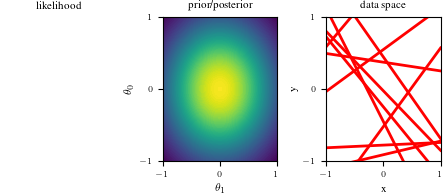

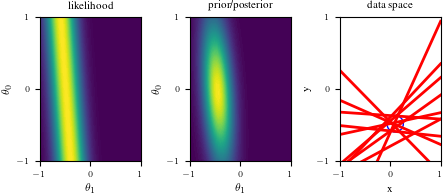

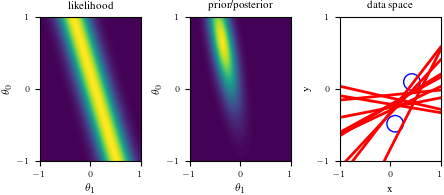

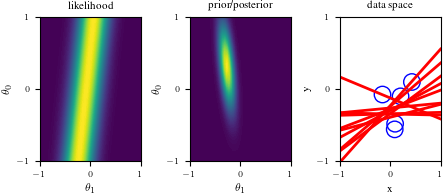

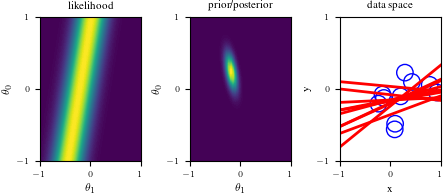

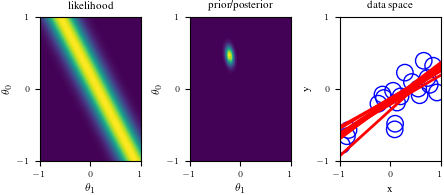

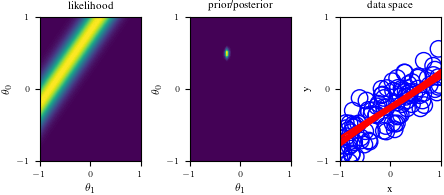

In [3]:
np.random.seed(0)

# Number of samples to draw from posterior distribution of parameters.
NSamples = 10

# Each of these corresponds to a row in the graphic and an amount of data the posterior will reflect.
# First one must be zero, for the prior.
DataIndices = [0, 1, 2, 5, 10, 20, 100]

# True regression parameters that we wish to recover. Do not set these outside the range of [-1,1]
a0 = -0.3
a1 = 0.5

NPoints = 100  # Number of (x,y) training points
noiseSD = 0.2  # True noise standard deviation
priorPrecision = 2.0  # Fix the prior precision, alpha. We will use a zero-mean isotropic Gaussian.
likelihoodSD = noiseSD  # Assume the likelihood precision, beta, is known.
likelihoodPrecision = 1.0 / (likelihoodSD**2)

# Because of how axises are set up, x and y values should be in the same range as the coefficients.

x = 2 * uniform().rvs(NPoints) - 1
y = a0 + a1 * x + norm(0, noiseSD).rvs(NPoints)


def MeanCovPost(x, y):
    # Given data vectors x and y, this returns the posterior mean and covariance.
    X = np.array([[1, x1] for x1 in x])
    Precision = np.diag([priorPrecision] * 2) + likelihoodPrecision * X.T.dot(X)
    Cov = np.linalg.inv(Precision)
    Mean = likelihoodPrecision * Cov.dot(X.T.dot(y))
    return {"Mean": Mean, "Cov": Cov}


def GaussPdfMaker(mean, cov):
    # For a given (mean, cov) pair, this returns a vectorized pdf function.
    def out(w1, w2):
        return multivariate_normal.pdf([w1, w2], mean=mean, cov=cov)

    return np.vectorize(out)


def LikeFMaker(x0, y0):
    # For a given (x,y) pair, this returns a vectorized likelhood function.
    def out(w1, w2):
        err = y0 - (w1 + w2 * x0)
        return norm.pdf(err, loc=0, scale=likelihoodSD)

    return np.vectorize(out)


# Grid space for which values will be determined, which is shared between the coefficient space and data space.
grid = np.linspace(-1, 1, 50)
Xg = np.array([[1, g] for g in grid])
G1, G2 = np.meshgrid(grid, grid)

# If we have many samples of lines, we make them a bit transparent.
alph = 5.0 / NSamples if NSamples > 50 else 1.0

# A function to make some common adjustments to our subplots.
def adjustgraph(whitemark):
    if whitemark:
        plt.ylabel(r"$\theta_0$")
        plt.xlabel(r"$\theta_1$")
        # plt.scatter(a0, a1, marker="+", color="white", s=100)
    else:
        plt.ylabel("y")
        plt.xlabel("x")
    plt.ylim([-1, 1])
    plt.xlim([-1, 1])
    plt.xticks([-1, 0, 1])
    plt.yticks([-1, 0, 1])
    return None


def create_figure(data_index):
    fig = plt.figure()
    
    # Left graph
    if(data_index==0):
      ax1 = fig.add_subplot(1, 3, 1)
      ax1.set_title("likelihood")
      ax1.axis("off")
    else:
      ax1 = fig.add_subplot(1, 3, 1)
      likfunc = LikeFMaker(x[di - 1], y[di - 1])
      ax1.contourf(G1, G2, likfunc(G1, G2), 100)
      adjustgraph(True)
      ax1.set_title("likelihood")
      # ax1.axis("off")
    
    # Middle graph
    ax2 = fig.add_subplot(1, 3, 2)
    postfunc = GaussPdfMaker(postM, postCov)
    ax2.contourf(G1, G2, postfunc(G1, G2), 100)
    adjustgraph(True)
    ax2.set_title("prior/posterior")
    
    # Right graph
    ax3 = fig.add_subplot(1, 3, 3)
    Samples = multivariate_normal(postM, postCov).rvs(NSamples)
    Lines = Xg.dot(Samples.T)
    if data_index != 0:
        ax3.scatter(x[:data_index], y[:data_index], s=140, facecolors="none", edgecolors="b")
    for j in range(Lines.shape[1]):
        ax3.plot(grid, Lines[:, j], linewidth=2, color="r", alpha=alph)
    adjustgraph(False)
    ax3.set_title('data space')
    
    return fig

# Loop through DataIndices to create separate figures for each row
for di in DataIndices:
    if di == 0:
        postM = [0, 0]
        postCov = np.diag([1.0 / priorPrecision] * 2)
    else:
        Post = MeanCovPost(x[:di], y[:di])
        postM = Post["Mean"]
        postCov = Post["Cov"]
    
    fig = create_figure(di)
    
    plt.tight_layout()
    plt.savefig(f"blr_{di}.png", dpi=900)
    plt.show()

/tmp/ipykernel_3006897/2174210570.py:86: UserWarning: This figure was using constrained_layout, but that is incompatible with subplots_adjust and/or tight_layout; disabling constrained_layout.
  plt.tight_layout()


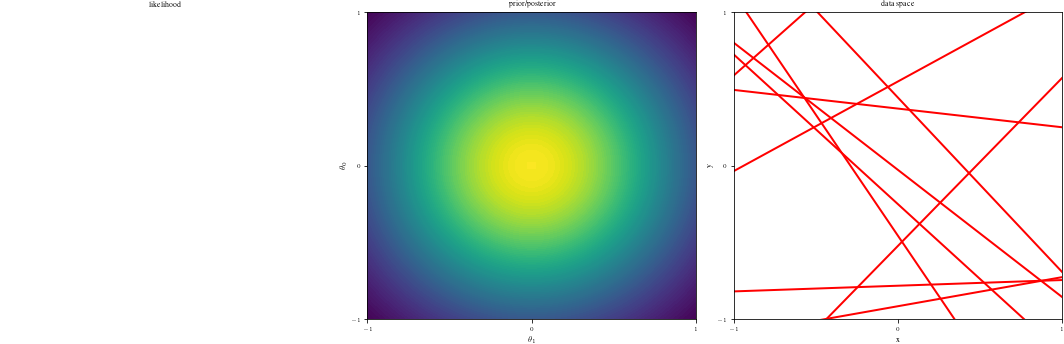

/tmp/ipykernel_3006897/2174210570.py:86: UserWarning: This figure was using constrained_layout, but that is incompatible with subplots_adjust and/or tight_layout; disabling constrained_layout.
  plt.tight_layout()


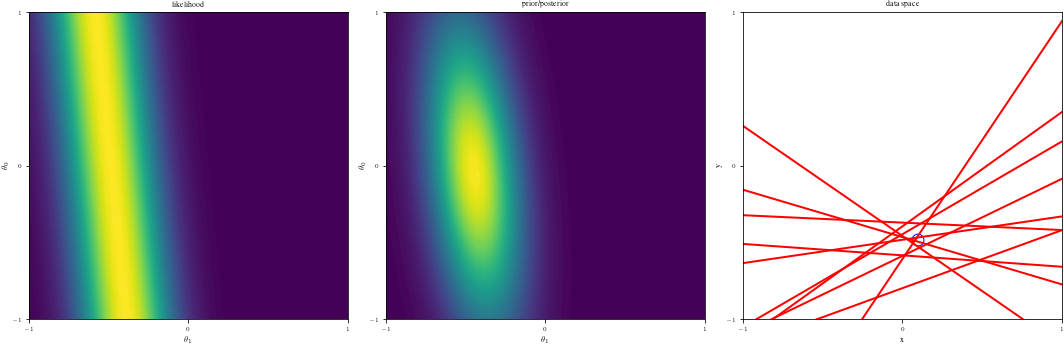

/tmp/ipykernel_3006897/2174210570.py:86: UserWarning: This figure was using constrained_layout, but that is incompatible with subplots_adjust and/or tight_layout; disabling constrained_layout.
  plt.tight_layout()


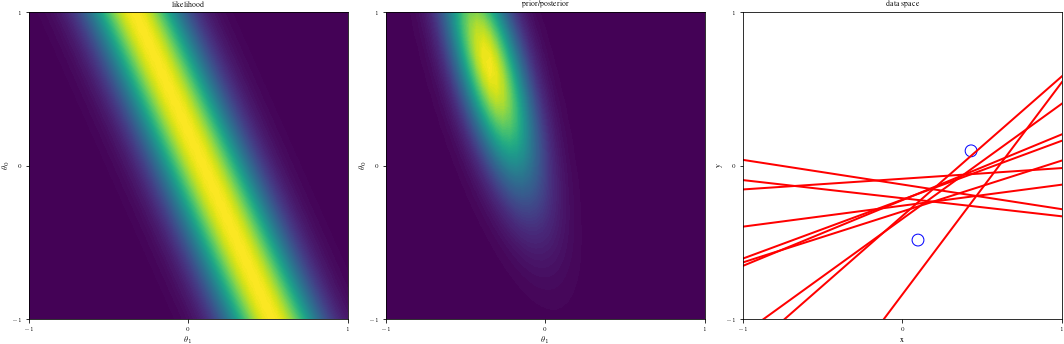

/tmp/ipykernel_3006897/2174210570.py:86: UserWarning: This figure was using constrained_layout, but that is incompatible with subplots_adjust and/or tight_layout; disabling constrained_layout.
  plt.tight_layout()


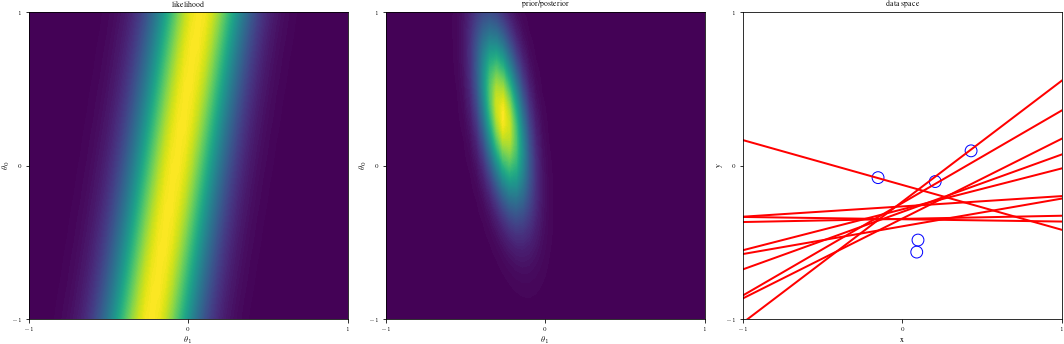

/tmp/ipykernel_3006897/2174210570.py:86: UserWarning: This figure was using constrained_layout, but that is incompatible with subplots_adjust and/or tight_layout; disabling constrained_layout.
  plt.tight_layout()


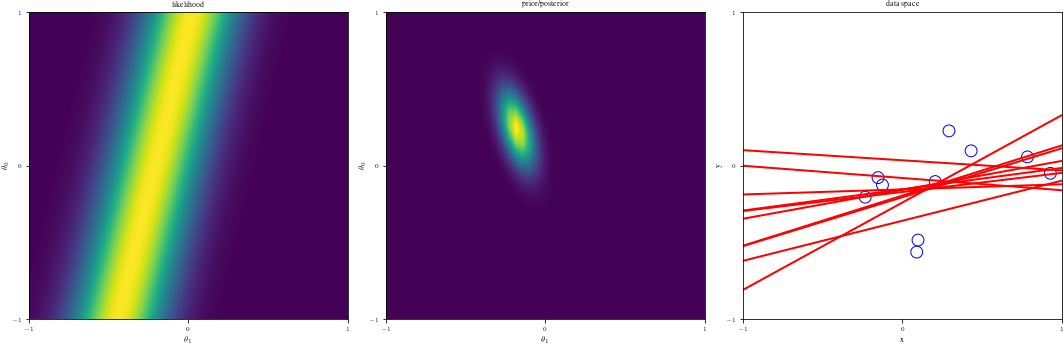

/tmp/ipykernel_3006897/2174210570.py:86: UserWarning: This figure was using constrained_layout, but that is incompatible with subplots_adjust and/or tight_layout; disabling constrained_layout.
  plt.tight_layout()


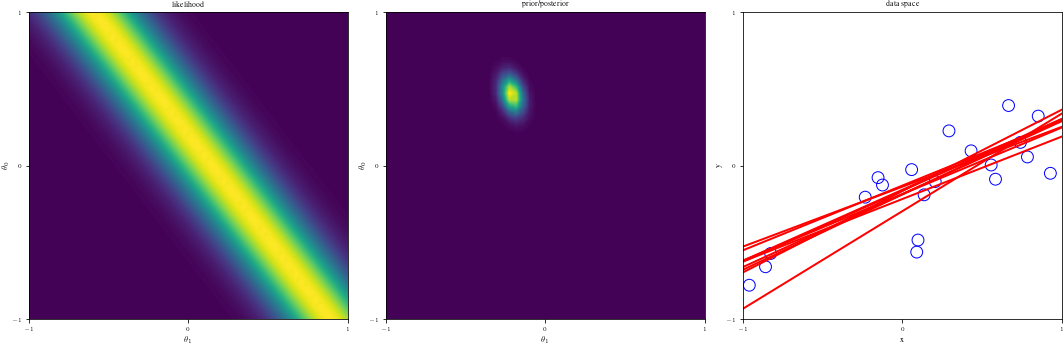

/tmp/ipykernel_3006897/2174210570.py:86: UserWarning: This figure was using constrained_layout, but that is incompatible with subplots_adjust and/or tight_layout; disabling constrained_layout.
  plt.tight_layout()


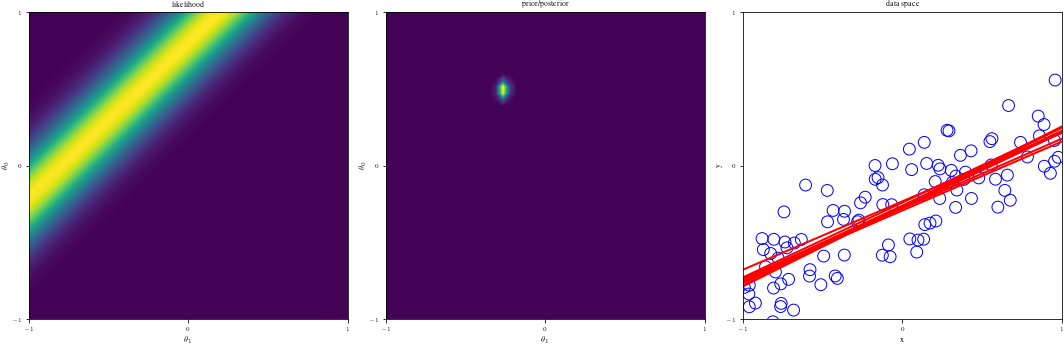

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm, multivariate_normal

np.random.seed(0)

NSamples = 10
DataIndices = [0, 1, 2, 5, 10, 20, 100]
a0 = -0.3
a1 = 0.5
NPoints = 100
noiseSD = 0.2
priorPrecision = 2.0
likelihoodSD = noiseSD
likelihoodPrecision = 1.0 / (likelihoodSD**2)

x = 2 * np.random.random(NPoints) - 1
y = a0 + a1 * x + np.random.normal(0, noiseSD, NPoints)

def MeanCovPost(x, y):
    X = np.array([[1, x1] for x1 in x])
    Precision = np.diag([priorPrecision] * 2) + likelihoodPrecision * X.T.dot(X)
    Cov = np.linalg.inv(Precision)
    Mean = likelihoodPrecision * Cov.dot(X.T.dot(y))
    return {"Mean": Mean, "Cov": Cov}

def GaussPdfMaker(mean, cov):
    def out(w1, w2):
        return multivariate_normal.pdf([w1, w2], mean=mean, cov=cov)
    return np.vectorize(out)

def LikeFMaker(x0, y0):
    def out(w1, w2):
        err = y0 - (w1 + w2 * x0)
        return norm.pdf(err, loc=0, scale=likelihoodSD)
    return np.vectorize(out)

grid = np.linspace(-1, 1, 50)
Xg = np.array([[1, g] for g in grid])
G1, G2 = np.meshgrid(grid, grid)

alph = 5.0 / NSamples if NSamples > 50 else 1.0

def adjustgraph(whitemark):
    if whitemark:
        plt.ylabel(r"$\theta_0$")
        plt.xlabel(r"$\theta_1$")
    else:
        plt.ylabel("y")
        plt.xlabel("x")
    plt.ylim([-1, 1])
    plt.xlim([-1, 1])
    plt.xticks([-1, 0, 1])
    plt.yticks([-1, 0, 1])
    return None

def create_figure(data_index):
    fig = plt.figure(figsize=(15, 5))
    
    ax1 = fig.add_subplot(1, 3, 1)
    if data_index == 0:
        ax1.set_title("likelihood")
        ax1.axis("off")
    else:
        likfunc = LikeFMaker(x[di - 1], y[di - 1])
        ax1.contourf(G1, G2, likfunc(G1, G2), 100)
        adjustgraph(True)
        ax1.set_title("likelihood")
    
    ax2 = fig.add_subplot(1, 3, 2)
    postfunc = GaussPdfMaker(postM, postCov)
    ax2.contourf(G1, G2, postfunc(G1, G2), 100)
    adjustgraph(True)
    ax2.set_title("prior/posterior")
    
    ax3 = fig.add_subplot(1, 3, 3)
    Samples = multivariate_normal(postM, postCov).rvs(NSamples)
    Lines = Xg.dot(Samples.T)
    if data_index != 0:
        ax3.scatter(x[:data_index], y[:data_index], s=140, facecolors="none", edgecolors="b")
    for j in range(Lines.shape[1]):
        ax3.plot(grid, Lines[:, j], linewidth=2, color="r", alpha=alph)
    adjustgraph(False)
    ax3.set_title('data space')
    
    plt.tight_layout()
    return fig

for di in DataIndices:
    if di == 0:
        postM = [0, 0]
        postCov = np.diag([1.0 / priorPrecision] * 2)
    else:
        Post = MeanCovPost(x[:di], y[:di])
        postM = Post["Mean"]
        postCov = Post["Cov"]
    
    fig = create_figure(di)
    #plt.savefig(f"blr_{di}.png", dpi=300)
    plt.show()
